## Task
##### Numerous factors contribute to a car's price, encompassing brand reputation, car features, horsepower, mileage efficiency, and more.
##### • Car price prediction stands as a significant domain within machine learning research.
##### • If you seek to master the art of training a car price prediction model, this project presents a valuable learning opportunity.


# Load the Libraries

In [1060]:
# used for performing Numerical operations
import numpy as np 
# used for data manipulation and analysis 
import pandas as pd            
# used for statistical data visualization
import seaborn as  sns           
# used for plotting and visualization
import matplotlib.pyplot as plt   
# used for applying machine learning algorithm.
from sklearn.model_selection import train_test_split                      
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Dataset

In [1061]:
# load the sample dataset into a dataframe
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Analysis

In [1062]:
# Displaying the column names of the sample dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [1063]:
# Displaying the Shape of the dataset
df.shape

(205, 26)

In [1064]:
# display descriptive statistics for the numerical values
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [1065]:
# Displaying the Brief summary of the sample dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1066]:
# Check the Unique values of each column
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [1067]:
# Checking the Missing values from the Data set
Missing_values=df.isnull().sum()
Missing_values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [1068]:
# Data Distribution
df.describe(include=['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [1069]:
# Check the unique values of Carname column
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [1070]:
# Splitting the column CarName into 2 columns- car_make & car_model
df["Car_Make"]=df['CarName'].str.split().str[0]
df["Car_Model"]=df['CarName'].str.split().str[1:].apply(' '.join)

df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Make,Car_Model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,100ls
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,fox
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,100ls
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,5000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,4000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,5000s (diesel)


In [1071]:
# Removing the CarName ,'and car_model colum  
df = df.drop(['CarName','Car_Model'],axis =1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1072]:
# Handling misspelled data
df.Car_Make.unique()
df['Car_Make'] = df['Car_Make'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
df.head()   

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Data Visualization

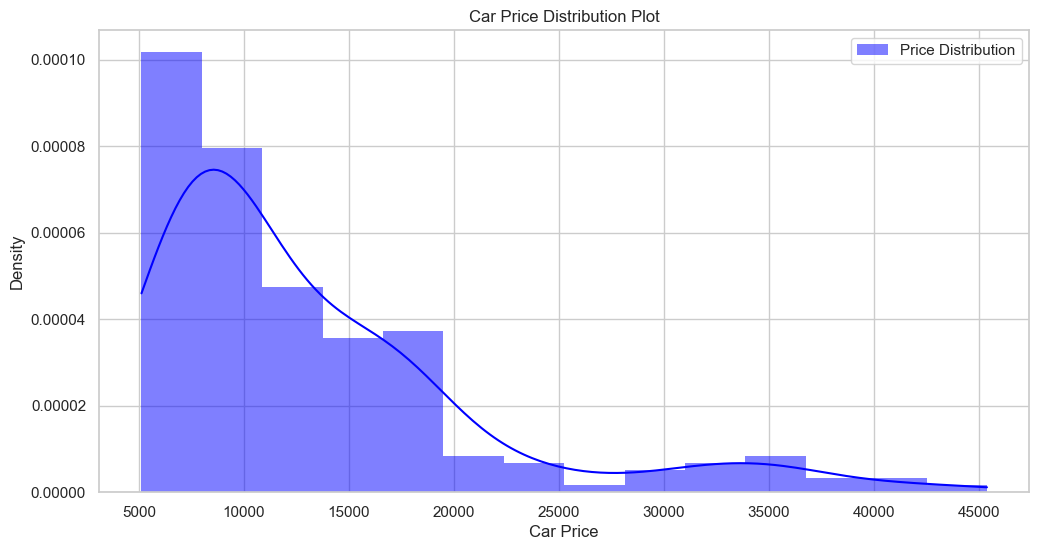

In [1073]:

# Set the style for the plots
sns.set(style="whitegrid")
# Create a figure and axis
plt.figure(figsize=(12, 6))
# Plot the distribution of car prices
sns.histplot(df['price'], kde=True, color='Blue', stat='density', linewidth=0, label='Price Distribution')
# Add labels and title
plt.xlabel('Car Price')
plt.ylabel('Density')
plt.title('Car Price Distribution Plot')
# Show legend
plt.legend()
# Show the plot
plt.show()


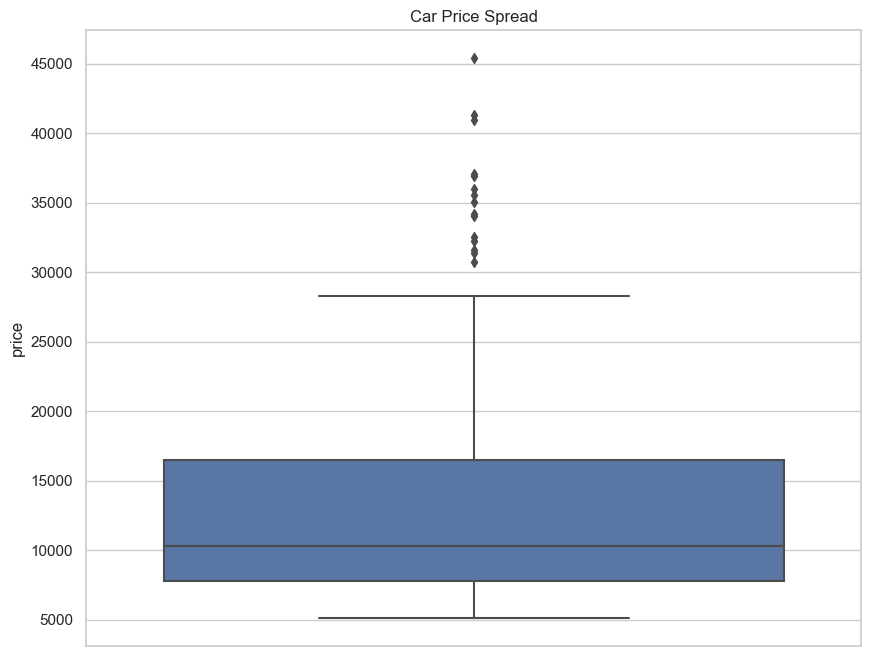

In [1074]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [1075]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

##### Visualising predictor Variables - Categorical variable

In [1076]:
# Segregating data according to datatypes
car_obj = df.select_dtypes(include = 'object')
print(car_obj.columns)
car_obj.head()

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Car_Make'],
      dtype='object')


,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Car_Make
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


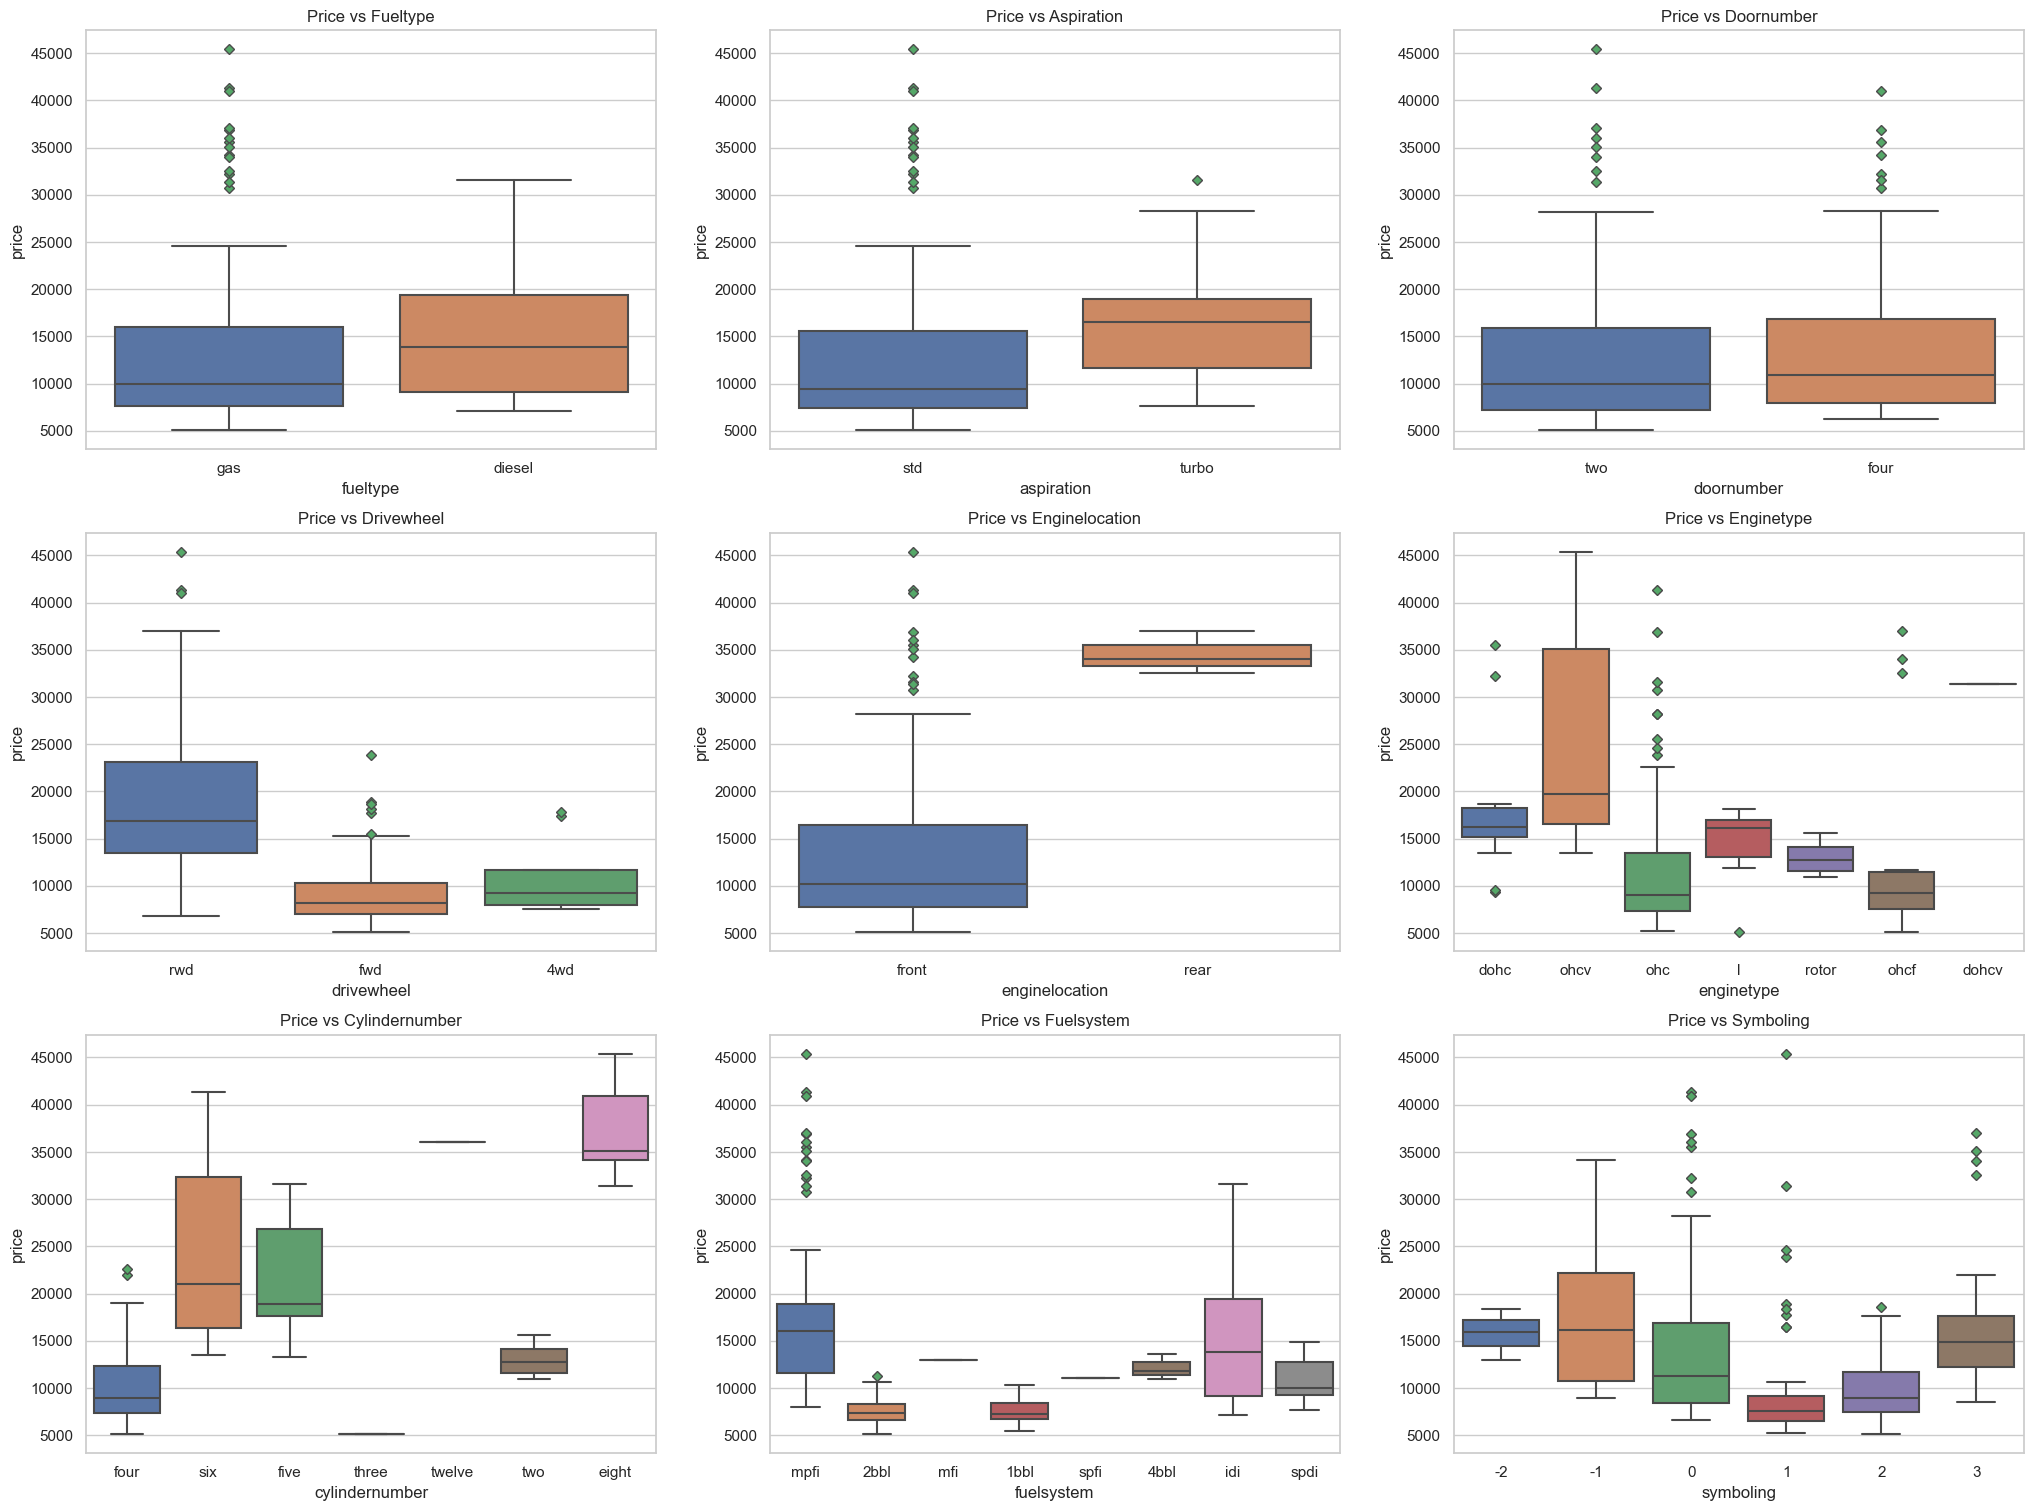

In [1077]:
# Set the figure size
plt.figure(figsize=(25, 25))

# List of features to plot
features = ['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation',
            'enginetype', 'cylindernumber', 'fuelsystem', 'symboling']

# Custom marker properties for outliers
green_diamond = dict(markerfacecolor='g', marker='D')

# Loop through features and create boxplots
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns, index i
    sns.boxplot(y='price', x=feature, data=df, flierprops=green_diamond)
    plt.title(f'Price vs {feature.capitalize()}')

# Show the plots
plt.show()


<Figure size 1500x1000 with 0 Axes>

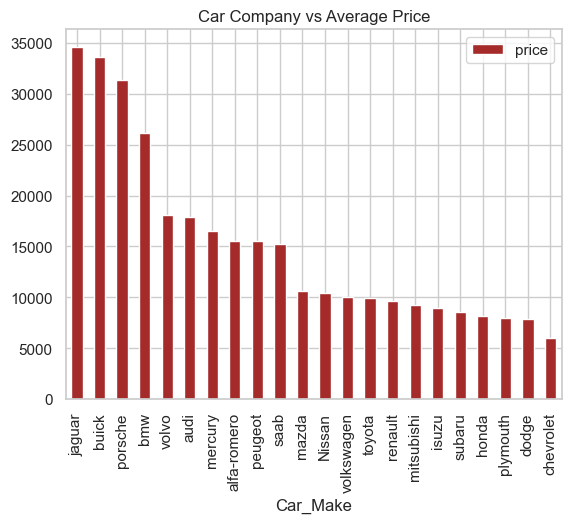

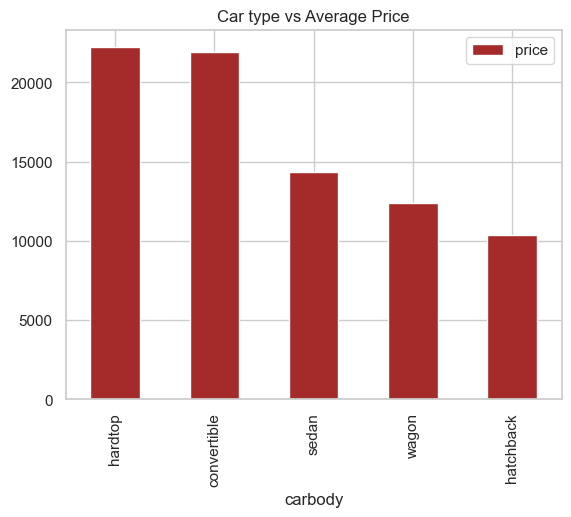

In [1078]:
# Let us also observe how brand name and car body affect price
make_gp = df.pivot_table(values = 'price', index = 'Car_Make',aggfunc ='mean').sort_values(by ='price', ascending = False)
body_gp = df.pivot_table(values = 'price', index = 'carbody',aggfunc ='mean').sort_values(by ='price', ascending = False)


plt.figure(figsize=(15,10))

make_gp.plot.bar(color='brown')
plt.title('Car Company vs Average Price')

body_gp.plot.bar(color='brown')
plt.title('Car type vs Average Price')

plt.show()

####  Visualising predictor Variables - Numerical variable

In [1079]:
# Segregating data according to datatype
car_num = df.select_dtypes(exclude = 'object')
# Removing unnecessary column
car_num= car_num.drop('car_ID',axis=1)
car_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1080]:
car_num.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [1081]:
car_num.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


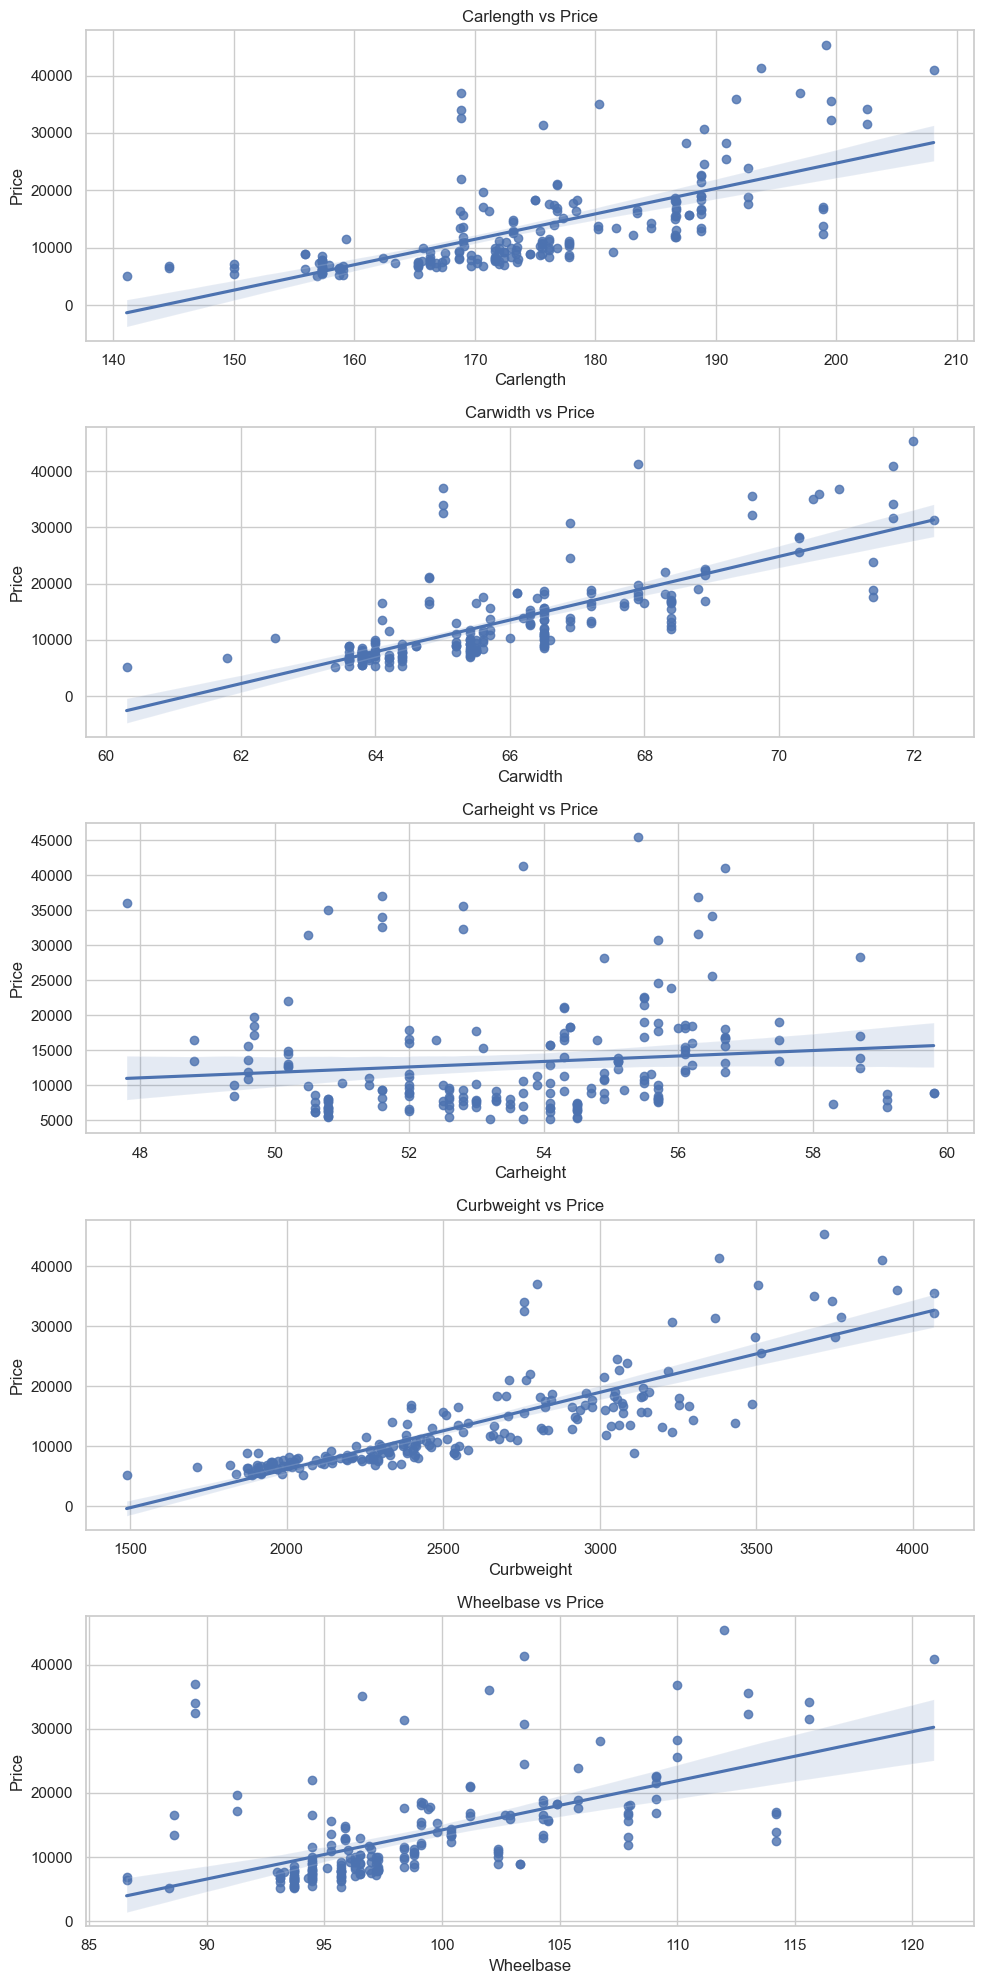

In [1082]:

# List of features to plot
features = ['carlength', 'carwidth', 'carheight', 'curbweight', 'wheelbase']

# Set up the figure size
plt.figure(figsize=(10, 20))

# Loop through features and create regression plots
for i, feature in enumerate(features, 1):
    plt.subplot(5, 1, i)
    sns.regplot(x=feature, y='price', data=df)
    plt.title(f'{feature.capitalize()} vs Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [1083]:
# Let us observe the correlation among these variables
car_dim = ['carlength','carwidth','carheight','curbweight','wheelbase','price']
df[car_dim].corr()

,carlength,carwidth,carheight,curbweight,wheelbase,price
carlength,1.000000,0.841118,0.491029,0.877728,0.874587,0.682920
carwidth,0.841118,1.000000,0.279210,0.867032,0.795144,0.759325
carheight,0.491029,0.279210,1.000000,0.295572,0.589435,0.119336
curbweight,0.877728,0.867032,0.295572,1.000000,0.776386,0.835305
wheelbase,0.874587,0.795144,0.589435,0.776386,1.000000,0.577816
price,0.682920,0.759325,0.119336,0.835305,0.577816,1.000000


<Figure size 1500x3000 with 0 Axes>

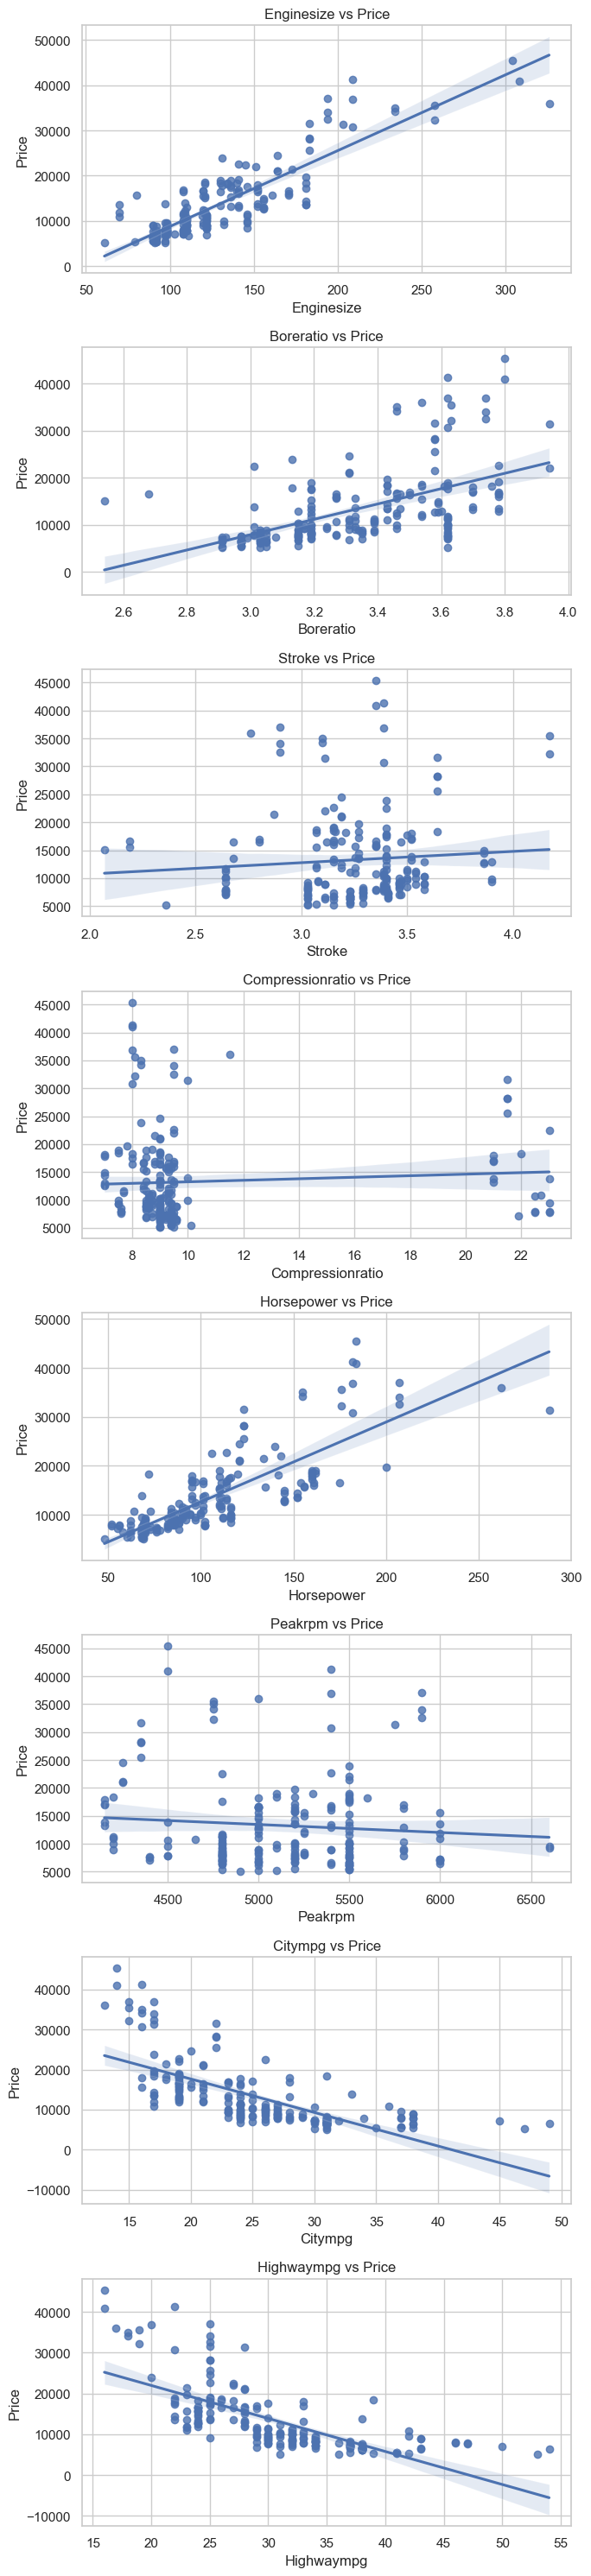

In [1084]:
# Other features of the car
plt.figure(figsize=(15,30))
features = ['enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
# Set up the figure size
plt.figure(figsize=(7, 30))
# Loop through features and create regression plots
for i, feature in enumerate(features, 1):
    plt.subplot(8, 1, i)
    sns.regplot(x=feature, y='price', data=df)
    plt.title(f'{feature.capitalize()} vs Price')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

In [1085]:
# Let us observe the correlation among these variables
car_features = ['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
df[car_features].corr()

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


<Axes: >

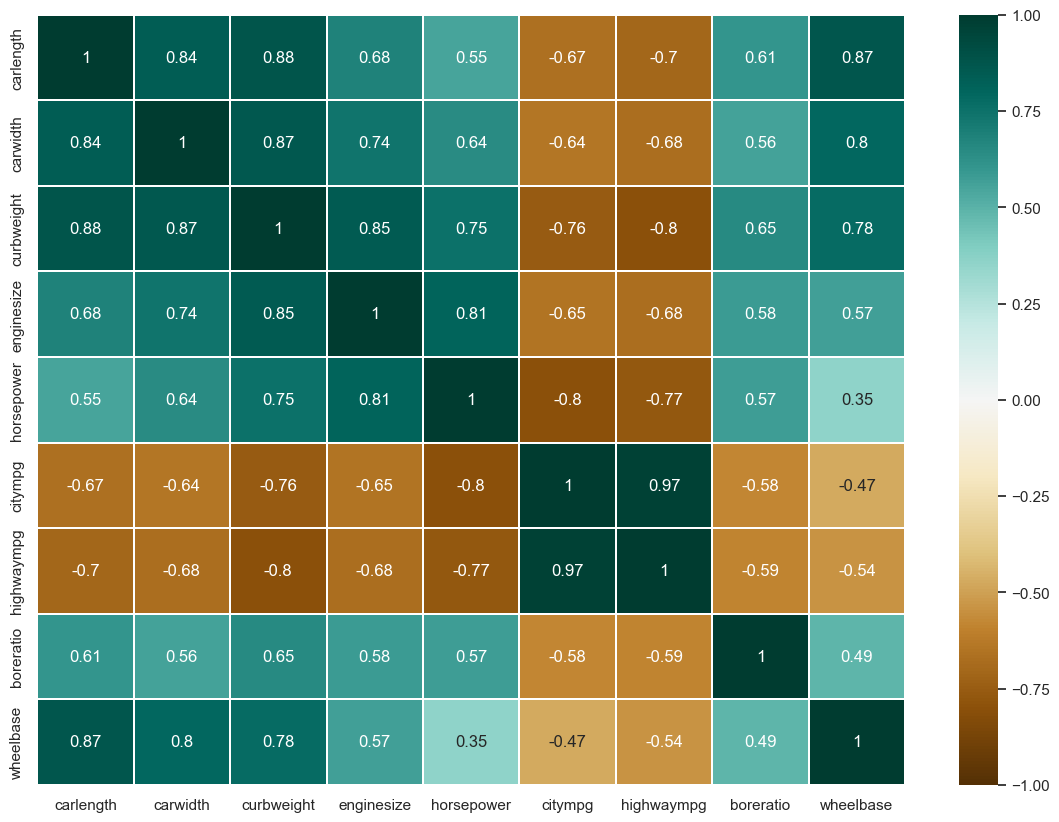

In [1086]:
plt.figure(figsize = (14,10))

num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio','wheelbase']
sns.heatmap(df[num_features].corr(), annot = True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)

### Feature Selection

#####  important features that affect price(target variable) to a great extent. This manual feature selection in the intial stages helps in bulding a good model.

In [1087]:
price_aff = df[['symboling','fueltype','aspiration','drivewheel','carbody','cylindernumber',
                'enginetype','enginelocation','carlength','carwidth','curbweight','enginesize','horsepower','citympg',
                'highwaympg','boreratio','wheelbase','Car_Make','price']]
print(price_aff.shape)
price_aff.head()

(205, 19)


,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,Car_Make,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0


##### We have selected 19 features out of 25 features. Let us proceed towards our next step which is model building.

<Figure size 2000x2000 with 0 Axes>

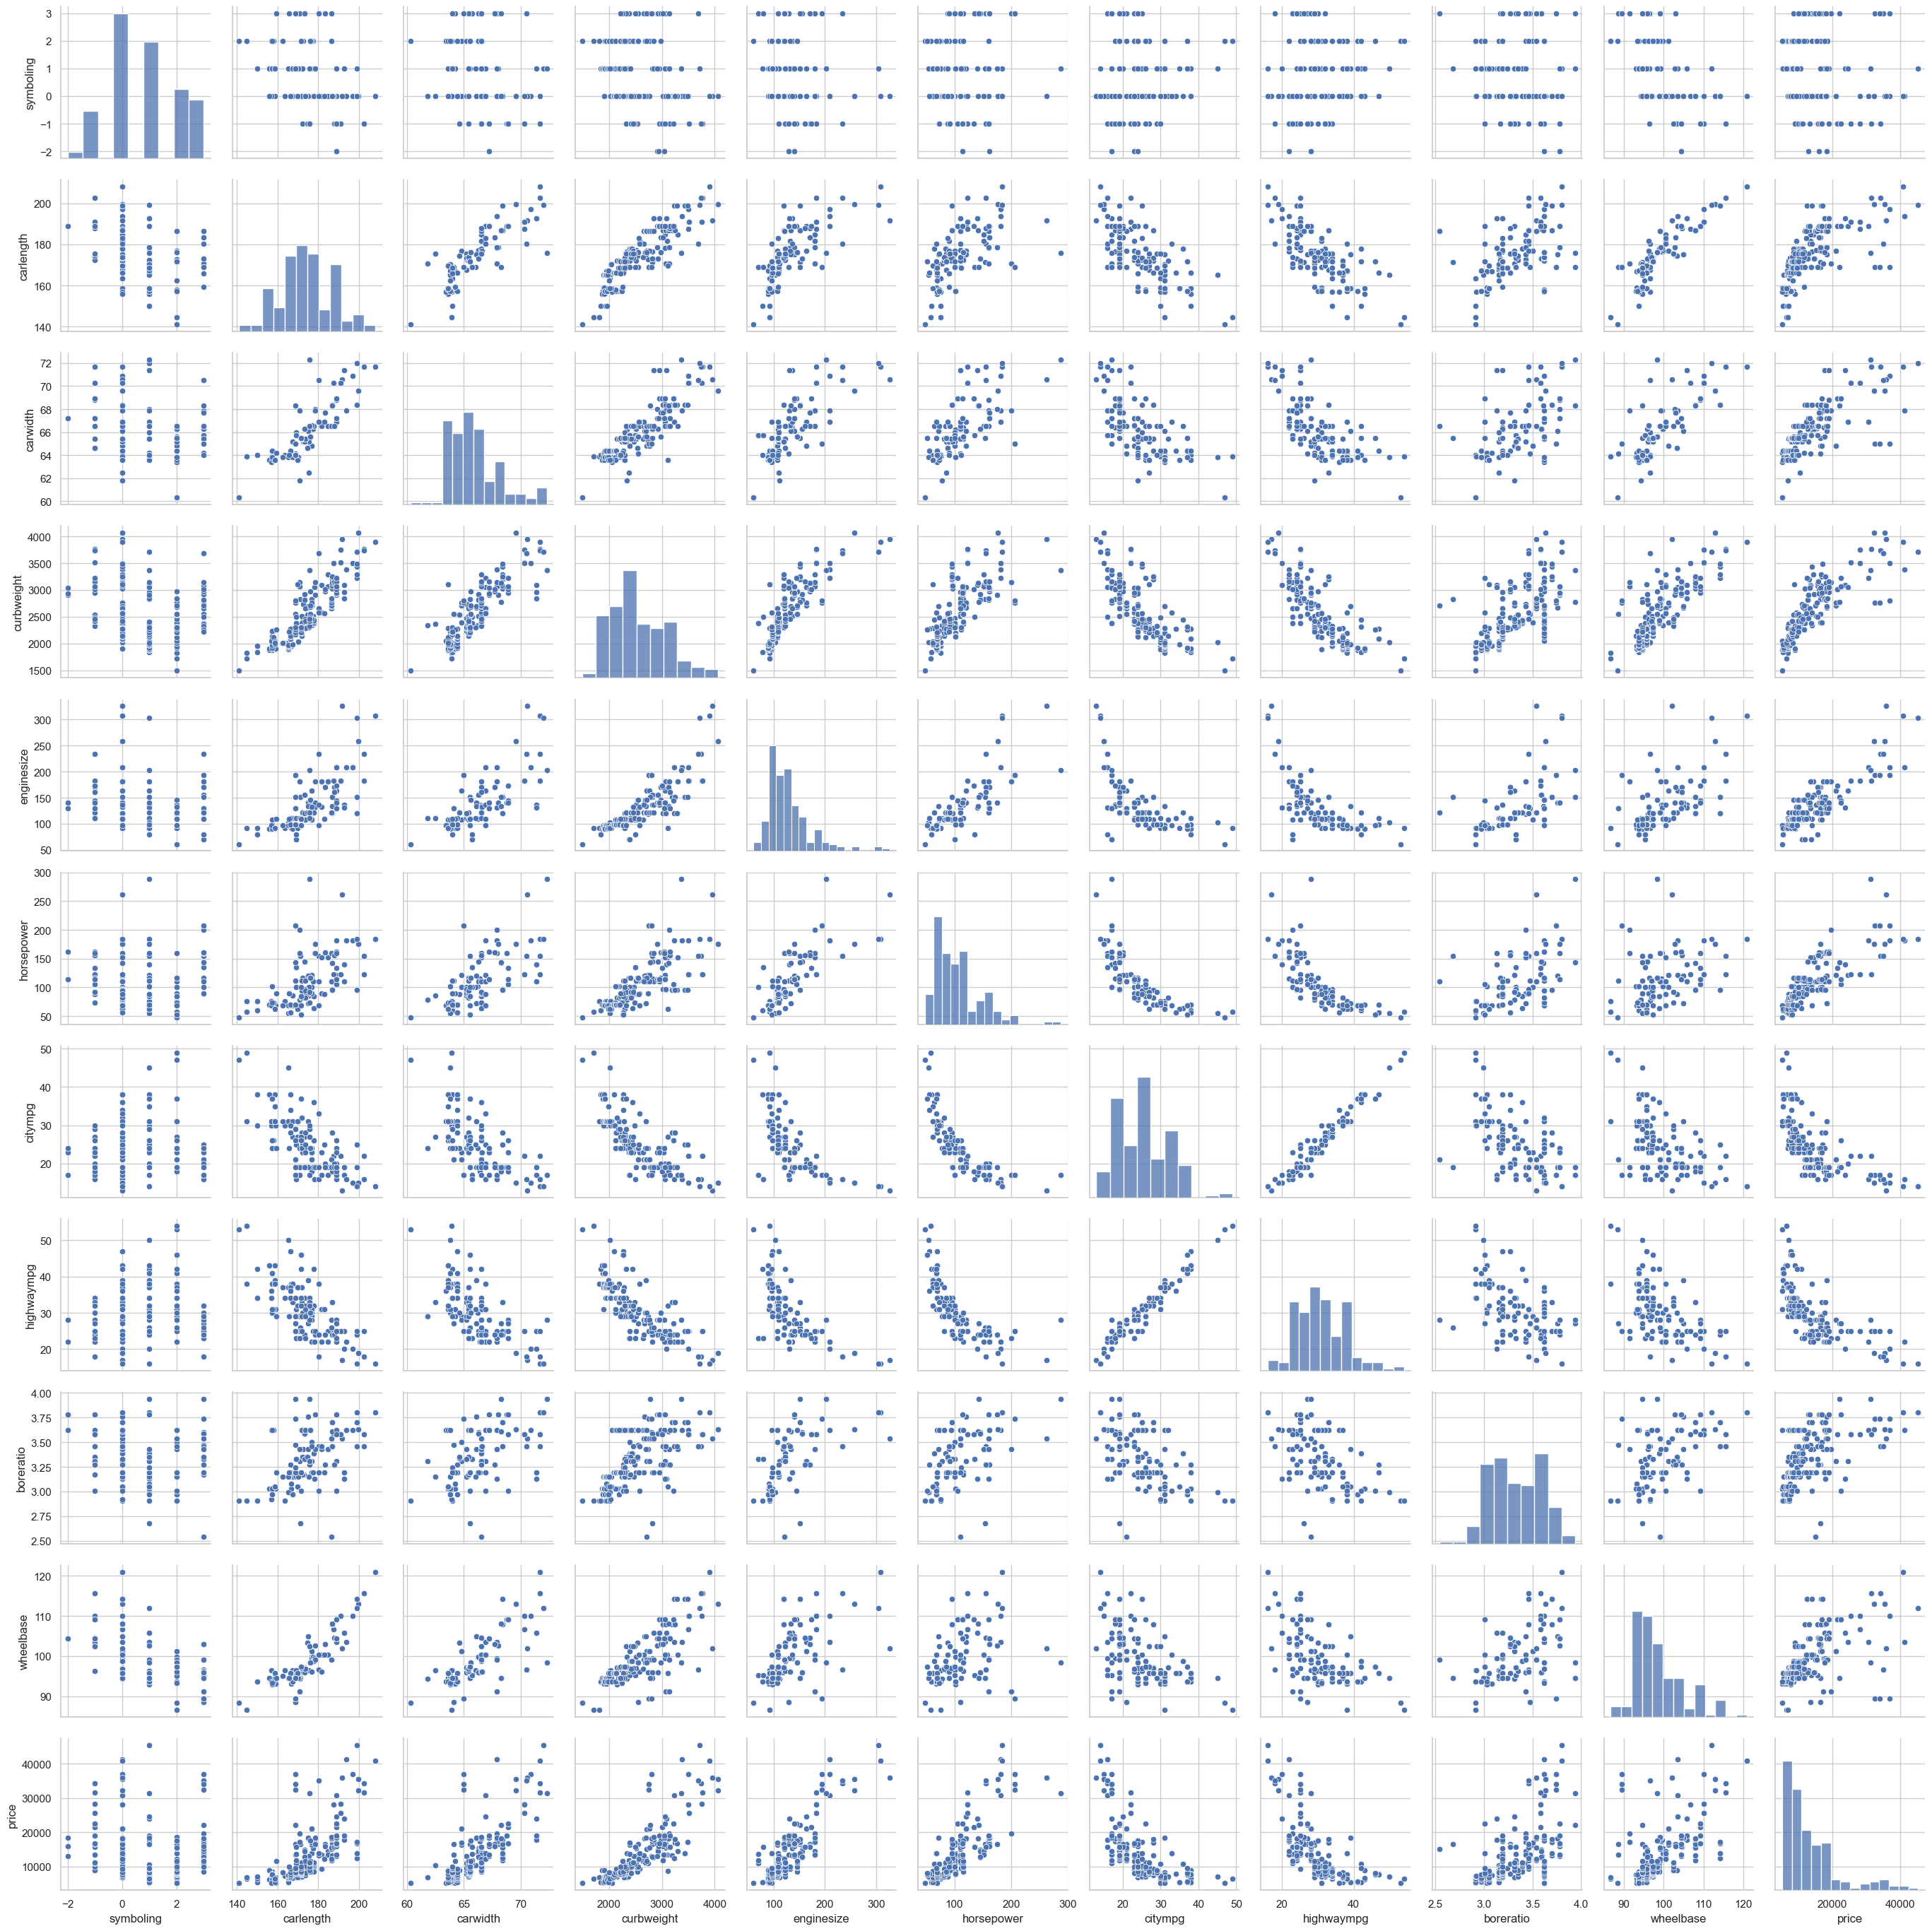

In [1088]:
plt.figure(figsize=(20,20))
# Let us observe correlation among these selected features
sns.pairplot(price_aff)
plt.tight_layout()
plt.show()

# Data Preparation

#### Deriving new metrics

In [1089]:
# Make an explicit copy of the DataFrame slice to avoid the warning
price_aff = price_aff.copy()

# Calculate a combined fuel economy score using city and highway mpg
price_aff['fuel_economy'] = (0.45 * price_aff['highwaympg']) + (0.55 * price_aff['citympg'])

# Drop the original 'citympg' and 'highwaympg' columns from the dataset
price_aff.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

# Display the first few rows of the updated dataset
price_aff.head()


,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,Car_Make,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,alfa-romero,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,audi,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,audi,17450.0,19.80


In [1090]:
# Create a pivot table for average price by car make, sorted by price in descending order
make_gp = df.pivot_table(values='price', index='Car_Make', aggfunc='mean').sort_values(by='price', ascending=False)

# Rename the 'price' column to 'price-1'
make_gp.rename(columns={'price': 'price-1'}, inplace=True)

# Display the resulting DataFrame
make_gp

,price-1
Car_Make,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


In [1091]:
make_gp = price_aff.merge(make_gp.reset_index(), how='left',on='Car_Make')

bins = np.linspace(min(make_gp['price-1']), max(make_gp['price-1']),4)

bin_name=['Economic','Medium','Luxury']

price_aff['class'] = pd.cut(make_gp['price-1'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
price_aff['class'] = price_aff['class'].astype(object)

#dropping the column make from the dataset
price_aff = price_aff.drop('Car_Make',axis =1)

price_aff.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


#### Ordinal categorical variables

In [1092]:
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}
price_aff['symboling'] = price_aff['symboling'].map(rating_dict)
price_aff.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


#### Creating Dummy Variables

In [1093]:
dum = price_aff.select_dtypes(include = 'object')
dummy = pd.get_dummies(dum, prefix=["fuel","aspiration","drive","body","cylindernum","engine",
                                         "engineloc" ,'class'], drop_first = True)
dummy.head()

,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,True,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,True


In [1094]:
dummy.columns

Index(['fuel_gas', 'aspiration_turbo', 'drive_fwd', 'drive_rwd',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'cylindernum_five', 'cylindernum_four', 'cylindernum_six',
       'cylindernum_three', 'cylindernum_twelve', 'cylindernum_two',
       'engine_dohcv', 'engine_l', 'engine_ohc', 'engine_ohcf', 'engine_ohcv',
       'engine_rotor', 'engineloc_rear', 'class_Luxury', 'class_Medium'],
      dtype='object')

In [1095]:
# Initialize the label encoder dictionary
label_encoder = {}

# List of columns to apply label encoding
columns_to_encode = ["fueltype", "aspiration", "drivewheel", "carbody", "cylindernumber", "enginetype", "enginelocation", "class"]

# Apply label encoding to each column
for column in columns_to_encode:
    if column in price_aff.columns:
        label_encoder[column] = LabelEncoder()
        price_aff[column] = label_encoder[column].fit_transform(price_aff[column])
    else:
        print(f"Warning: Column '{column}' does not exist in the DataFrame.")
price_aff.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,1,0,2,0,2,0,0,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,0
1,6,1,0,2,0,2,0,0,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,0
2,4,1,0,2,2,3,5,0,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,0
3,5,1,0,1,3,2,3,0,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,2
4,5,1,0,0,3,1,3,0,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,2


In [1096]:
#Add the results to the original car dataframe
price_aff= pd.concat([price_aff, dummy], axis = 1)
price_aff.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,1,0,2,0,2,0,0,168.8,64.1,...,False,False,False,False,False,False,False,False,False,False
1,6,1,0,2,0,2,0,0,168.8,64.1,...,False,False,False,False,False,False,False,False,False,False
2,4,1,0,2,2,3,5,0,171.2,65.5,...,False,False,False,False,False,True,False,False,False,False
3,5,1,0,1,3,2,3,0,176.6,66.2,...,False,False,False,True,False,False,False,False,False,True
4,5,1,0,0,3,1,3,0,176.6,66.4,...,False,False,False,True,False,False,False,False,False,True


In [1097]:
# drop duplicate columns
del_list = dum.columns
price_aff= price_aff.drop(del_list, axis = 1)
price_aff.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,...,False,False,False,False,False,False,False,False,False,False
1,6,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,...,False,False,False,False,False,False,False,False,False,False
2,4,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,...,False,False,False,False,False,True,False,False,False,False
3,5,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,...,False,False,False,True,False,False,False,False,False,True
4,5,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,...,False,False,False,True,False,False,False,False,False,True


In [1098]:
price_aff.shape
print("Our Final dataset has",price_aff.shape[0],'number of rows')
print("Our Final dataset has",price_aff.shape[1],'number of columns')

Our Final dataset has 205 number of rows
Our Final dataset has 33 number of columns


##### Feature scaling- Minmax scaling (normalisation)

In [1099]:
# Applying scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

scaler = MinMaxScaler()
price_aff[num_vars] = scaler.fit_transform(price_aff[num_vars])

price_aff.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,...,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,1.0,0.413433,0.316667,0.411171,0.260377,0.262500,0.664286,0.058309,0.207959,0.244170,...,False,False,False,False,False,False,False,False,False,False
1,1.0,0.413433,0.316667,0.411171,0.260377,0.262500,0.664286,0.058309,0.282558,0.244170,...,False,False,False,False,False,False,False,False,False,False
2,0.6,0.449254,0.433333,0.517843,0.343396,0.441667,0.100000,0.230321,0.282558,0.201646,...,False,False,False,False,False,True,False,False,False,False
3,0.8,0.529851,0.491667,0.329325,0.181132,0.225000,0.464286,0.384840,0.219254,0.326475,...,False,False,False,True,False,False,False,False,False,True
4,0.8,0.529851,0.508333,0.518231,0.283019,0.279167,0.464286,0.373178,0.306142,0.137174,...,False,False,False,True,False,False,False,False,False,True


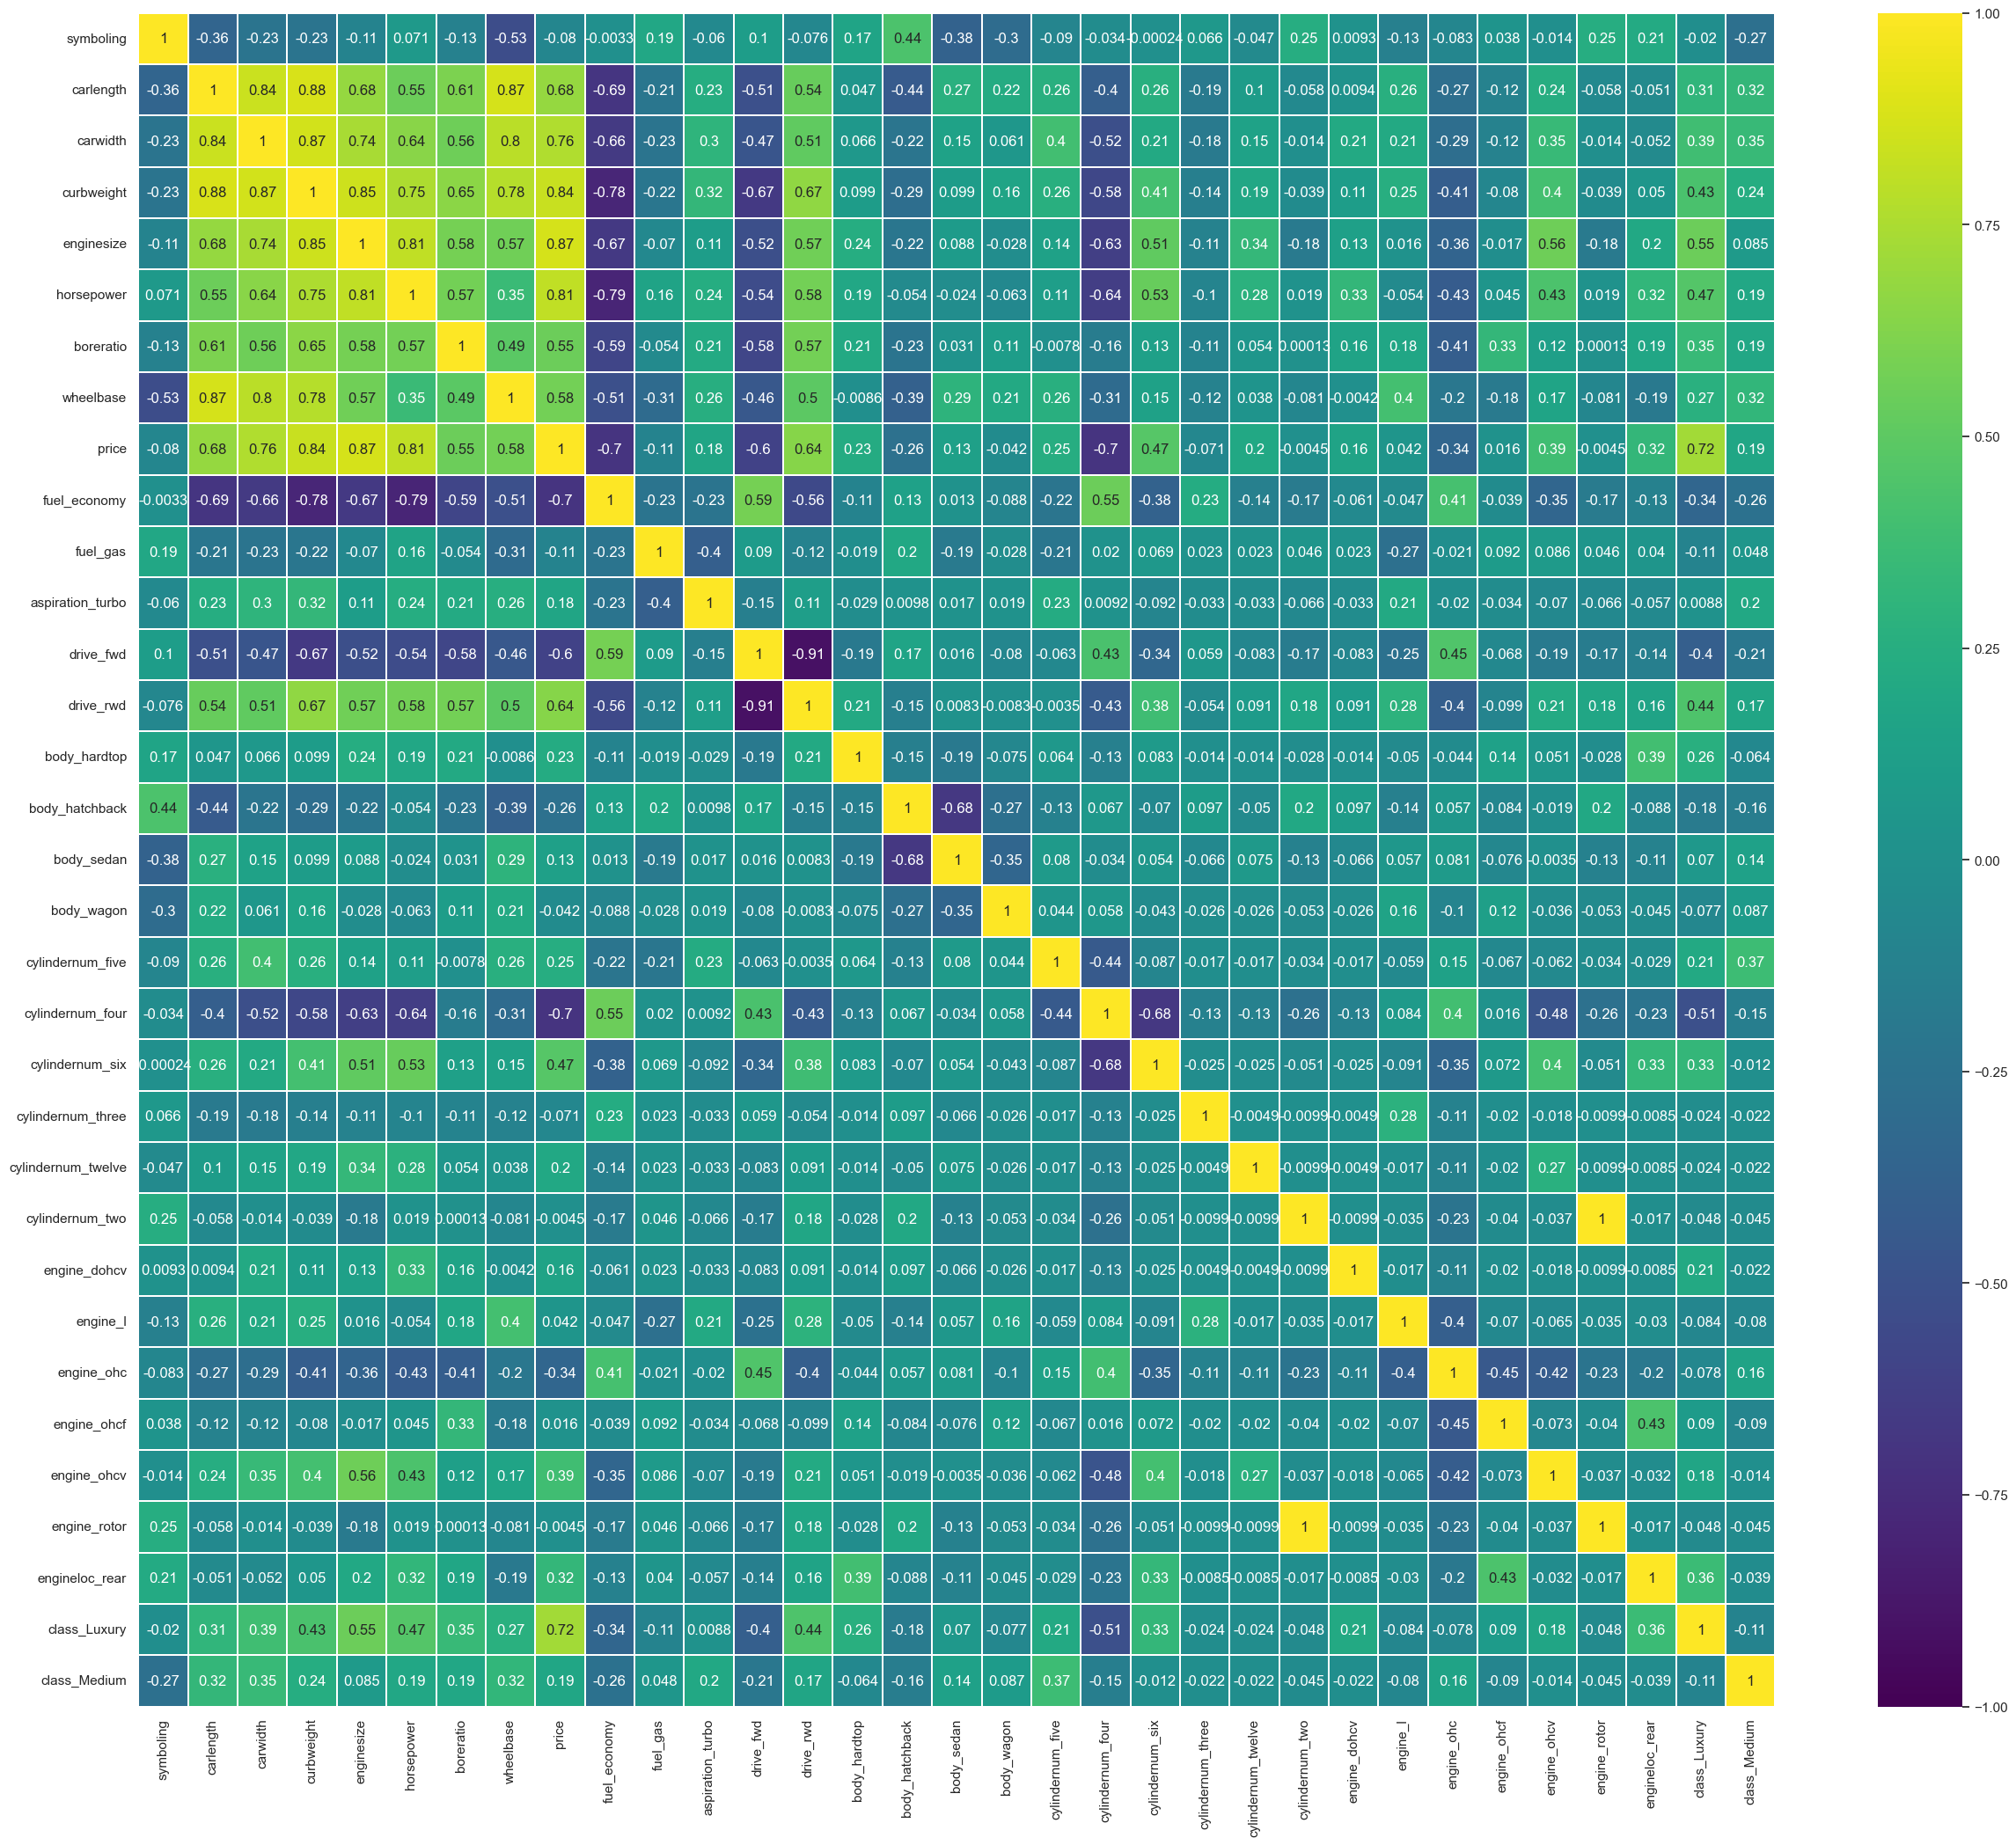

In [1100]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
# sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")

sns.heatmap(price_aff.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.show()

# Splitting the data into training and test sets

In [1101]:
# Data Preprocessing
X = price_aff.drop('price', axis=1)
y = price_aff['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [1102]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Linear Regression Model

In [1117]:
lr=LinearRegression()
# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Random Forest Regressor

In [1118]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

## Model Evaluation

In [1120]:
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R-Squared Error:",r2)


Mean Absolute Error: 0.047438377832333116
Mean Squared Error: 0.005088194081350998
R-Squared Error: 0.892829236864805


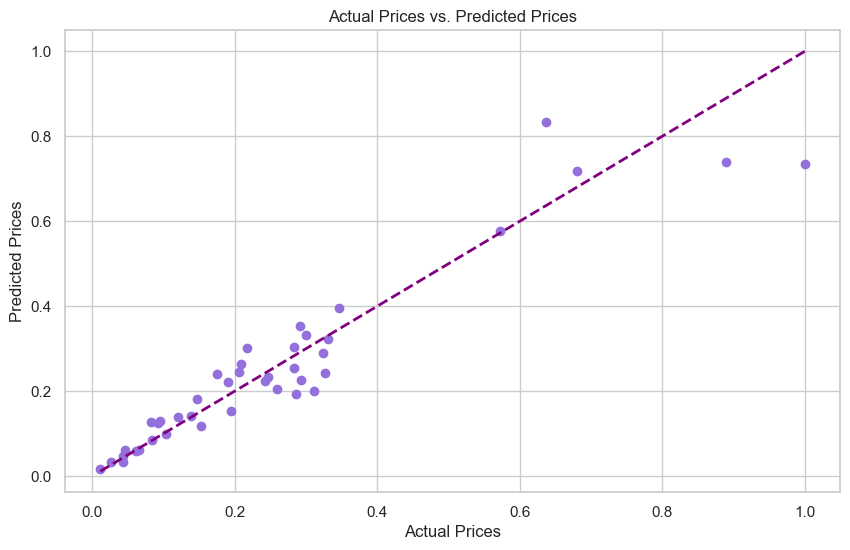

In [1111]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='mediumpurple')  # Use 'mediumpurple' (valid color name)

x_min, x_max = min(y_test), max(y_test)
y_min, y_max = min(y_test), max(y_test)

plt.plot([x_min, x_max], [y_min, y_max], linestyle='--', color='purple', linewidth=2)  # Diagonal line

plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

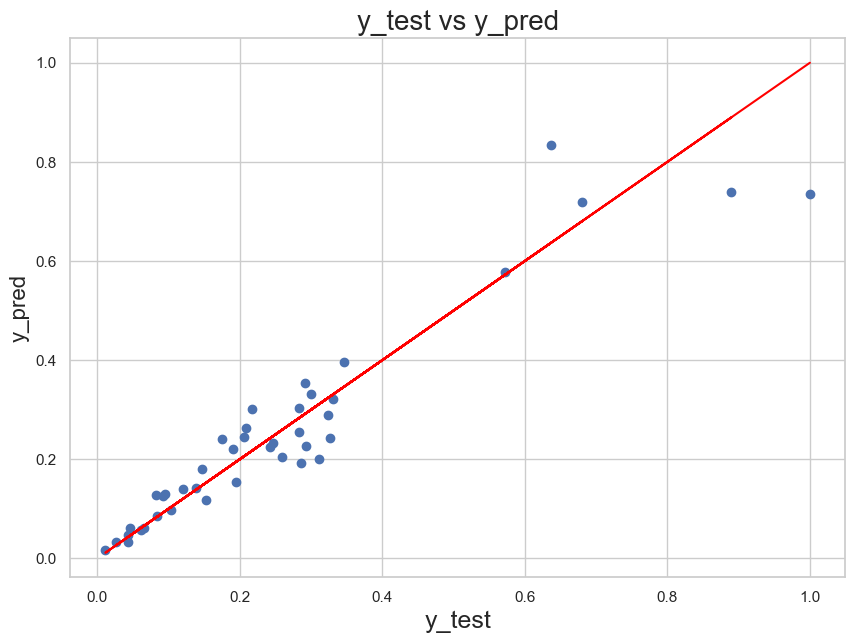

In [1112]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="red")

#### Conclusion:The Random Forest model performed the best with a R2 score of 0.89.